In [1]:
# Unduh Dataset MNIST
from sklearn.datasets import fetch_openml

mnist = fetch_openml('mnist_784')

In [2]:
# Baca deskripsi dataset
# Tahap ini mungkin diperlukan untuk lebih memahami dataset
print(mnist.DESCR)

**Author**: Yann LeCun, Corinna Cortes, Christopher J.C. Burges  
**Source**: [MNIST Website](http://yann.lecun.com/exdb/mnist/) - Date unknown  
**Please cite**:  

The MNIST database of handwritten digits with 784 features, raw data available at: http://yann.lecun.com/exdb/mnist/. It can be split in a training set of the first 60,000 examples, and a test set of 10,000 examples  

It is a subset of a larger set available from NIST. The digits have been size-normalized and centered in a fixed-size image. It is a good database for people who want to try learning techniques and pattern recognition methods on real-world data while spending minimal efforts on preprocessing and formatting. The original black and white (bilevel) images from NIST were size normalized to fit in a 20x20 pixel box while preserving their aspect ratio. The resulting images contain grey levels as a result of the anti-aliasing technique used by the normalization algorithm. the images were centered in a 28x28 image b

In [3]:
# Inspeksi semua key dalam dataset
# Cara ini digunakan untuk memahami struktur dari dataset MNIST
mnist.keys()

dict_keys(['data', 'target', 'frame', 'categories', 'feature_names', 'target_names', 'DESCR', 'details', 'url'])

##### Cek Imbalance Data

Counter({1: 7877, 7: 7293, 3: 7141, 2: 6990, 9: 6958, 0: 6903, 6: 6876, 8: 6825, 4: 6824, 5: 6313})


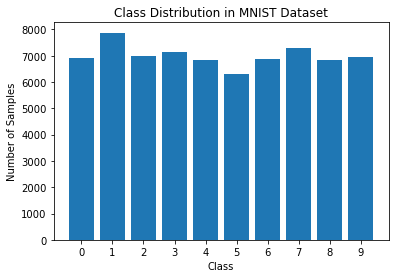

In [4]:
import matplotlib.pyplot as plt
import numpy as np
from collections import Counter

# Extract features and labels
x, y = mnist.data, mnist.target.astype(int)

# Count the Class Frequencies
class_counts = Counter(y)
print(class_counts)

# Convert class_counts to a list of counts for each class
counts = [class_counts[i] for i in range(10)]

# Define class labels
class_labels = [str(i) for i in range(10)]

# Create a bar chart
plt.bar(class_labels, counts)
plt.xlabel('Class')
plt.ylabel('Number of Samples')
plt.title('Class Distribution in MNIST Dataset')
plt.show()

In [5]:
# Calculate Class Imbalance Ratios
class_ratios = {class_label: count / len(y) for class_label, count in class_counts.items()}
# Print Class Distribution Statistics
print("Class Distribution in MNIST Dataset:")
for class_label, count in class_counts.items():
    print(f"Class {class_label}: {count} samples ({class_ratios[class_label]*100:.2f}% of total)")

# Find the Imbalanced Classes (if any)
imbalanced_classes = [class_label for class_label, ratio in class_ratios.items() if ratio < 0.05]
if len(imbalanced_classes) > 0:
    print("Imbalanced Classes:", imbalanced_classes)
else:
    print("The dataset is approximately balanced.")

Class Distribution in MNIST Dataset:
Class 5: 6313 samples (9.02% of total)
Class 0: 6903 samples (9.86% of total)
Class 4: 6824 samples (9.75% of total)
Class 1: 7877 samples (11.25% of total)
Class 9: 6958 samples (9.94% of total)
Class 2: 6990 samples (9.99% of total)
Class 3: 7141 samples (10.20% of total)
Class 6: 6876 samples (9.82% of total)
Class 7: 7293 samples (10.42% of total)
Class 8: 6825 samples (9.75% of total)
The dataset is approximately balanced.


##### Menampilkan 15 citra dari data MNIST

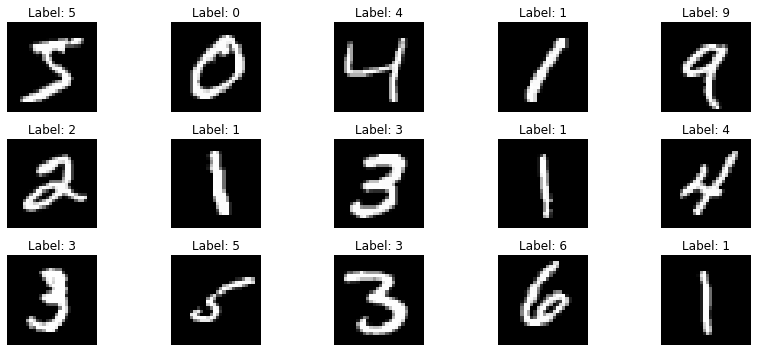

In [6]:
import matplotlib.pyplot as plt
from sklearn.datasets import fetch_openml

# Mengunduh dataset MNIST
mnist = fetch_openml('mnist_784', version=1, as_frame=False)

# Mengambil data dan label
X = mnist.data
y = mnist.target

# Menampilkan 15 citra pertama berserta labelnya
plt.figure(figsize=(12, 5))
for i in range(15):
    plt.subplot(3, 5, i + 1)
    plt.imshow(X[i].reshape(28, 28), cmap='gray')
    plt.title(f'Label: {y[i]}')
    plt.axis('off')

plt.tight_layout()
plt.show()

##### Ekstraksi Fitur dengan PCA

In [7]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import fetch_openml
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

# Muat dataset MNIST
mnist = fetch_openml('mnist_784')
X, y = mnist.data.astype('int'), mnist.target.astype('int')

# Standarisasi data
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Menjalankan PCA dengan jumlah komponen yang diinginkan (misalnya, 50 komponen)
num_components = 50
pca = PCA(n_components=num_components)
X_pca = pca.fit_transform(X_scaled)

# Proporsi varians yang dijelaskan oleh setiap komponen PCA
explained_variance_ratio = pca.explained_variance_ratio_
print("Proporsi Variasi yang Dijelaskan oleh Setiap Komponen PCA:")
print(explained_variance_ratio)


Proporsi Variasi yang Dijelaskan oleh Setiap Komponen PCA:
[0.05642719 0.04041226 0.03738273 0.02893    0.02520752 0.02192549
 0.01914282 0.01740684 0.01532232 0.01396087 0.01342175 0.01201421
 0.01113962 0.01090582 0.01027985 0.00994955 0.00931255 0.00919634
 0.00888599 0.00863195 0.0082174  0.00798414 0.00762568 0.00742306
 0.00716544 0.00689284 0.00681362 0.00654518 0.00627246 0.00610172
 0.00597034 0.00589118 0.00567274 0.00559291 0.00552209 0.00533917
 0.00526574 0.00514838 0.00504912 0.0047694  0.00473323 0.00462715
 0.00450686 0.00444218 0.0043917  0.00436034 0.0042983  0.00425437
 0.004179   0.00414662]


##### Split Dataset 80 : 20

In [8]:
from sklearn.model_selection import train_test_split

# Bagi dataset menjadi data latih (train) dan data uji (test) dengan proporsi 80:20
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [9]:
from sklearn.naive_bayes import MultinomialNB
from sklearn.datasets import fetch_openml

# Muat dataset MNIST
mnist = fetch_openml('mnist_784')
X, y = mnist.data.astype('int'), mnist.target.astype('int')

# Inisialisasi dan melatih model Multinomial Naive Bayes
nb_classifier = MultinomialNB()
nb_classifier.fit(X_train, y_train)

MultinomialNB()

##### Klasifikasi Algoritma Naive Bayes Multinomial

In [10]:
import numpy as np
from sklearn.metrics import accuracy_score

# Melakukan prediksi pada data pelatihan dan pengujian
y_train_pred = nb_classifier.predict(X_train)
y_test_pred = nb_classifier.predict(X_test)

# Menghitung akurasi data pengujian
accuracy_test = accuracy_score(y_test, y_test_pred)
print("Akurasi Data Testing:", accuracy_test)

# Menghitung akurasi data pelatihan
accuracy_train = accuracy_score(y_train, y_train_pred)
print("Akurasi Data Training:", accuracy_train)

Akurasi Data Testing: 0.829
Akurasi Data Training: 0.8266785714285714


##### Evaluasi Model Menggunakan Fungsi classification_report

In [11]:
import numpy as np
from sklearn.metrics import classification_report

# Melakukan prediksi pada data pelatihan dan pengujian
y_train_pred = nb_classifier.predict(X_train)
y_test_pred = nb_classifier.predict(X_test)

# Menampilkan classification report
print("\nClassification Report untuk Data Testing:")
print(classification_report(y_test, y_test_pred))

print("\nClassification Report untuk Data Training:")
print(classification_report(y_train, y_train_pred))


Classification Report untuk Data Testing:
              precision    recall  f1-score   support

           0       0.93      0.90      0.92      1343
           1       0.88      0.94      0.90      1600
           2       0.88      0.83      0.85      1380
           3       0.80      0.82      0.81      1433
           4       0.84      0.74      0.78      1295
           5       0.86      0.67      0.75      1273
           6       0.88      0.91      0.90      1396
           7       0.94      0.83      0.88      1503
           8       0.67      0.78      0.72      1357
           9       0.70      0.84      0.76      1420

    accuracy                           0.83     14000
   macro avg       0.84      0.83      0.83     14000
weighted avg       0.84      0.83      0.83     14000


Classification Report untuk Data Training:
              precision    recall  f1-score   support

           0       0.92      0.91      0.91      5560
           1       0.89      0.94      0.91  

##### Evaluasi Model Menggunakan Confusion Matrix

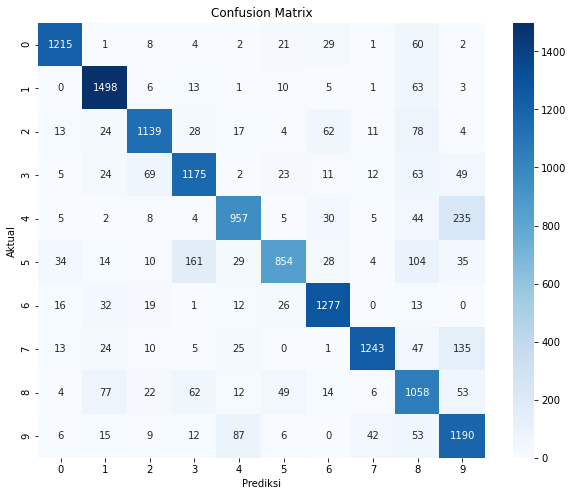

In [12]:
import numpy as np
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

# Melakukan prediksi pada data pengujian
y_pred = nb_classifier.predict(X_test)

# Menghasilkan confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred)

# Menampilkan confusion matrix menggunakan heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=range(10), yticklabels=range(10))
plt.xlabel('Prediksi')
plt.ylabel('Aktual')
plt.title('Confusion Matrix')
plt.show()


##### Tampilkan Citra Data Testing beserta Pelabelannya

KeyError: 0

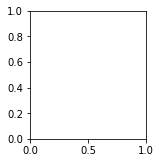

In [34]:
import numpy as np
from sklearn.datasets import fetch_openml
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import MultinomialNB
import matplotlib.pyplot as plt

# Muat dataset MNIST
mnist = fetch_openml('mnist_784')
X, y = mnist.data.astype('int'), mnist.target.astype('int')

# Bagi dataset menjadi data pelatihan dan pengujian
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Inisialisasi dan melatih model Multinomial Naive Bayes
nb_classifier = MultinomialNB()
nb_classifier.fit(X_train, y_train)

# Melakukan prediksi pada data pengujian
y_pred = nb_classifier.predict(X_test)

# Menampilkan citra dari data pengujian berserta hasil prediksi
plt.figure(figsize=(12, 8))
for i in range(15):
    plt.subplot(3, 5, i + 1)
    plt.imshow(X_test[i].reshape(28, 28), cmap='gray')
    plt.title(f'Prediksi: {y_pred[i]}\nAktual: {y_test[i]}')  # Menggunakan y_test[i] langsung
    plt.axis('off')

plt.show()


##### Split Dataset 70 : 30

In [13]:
from sklearn.model_selection import train_test_split

# Bagi dataset menjadi data latih (train) dan data uji (test) dengan proporsi 70:30
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [14]:
from sklearn.naive_bayes import MultinomialNB
from sklearn.datasets import fetch_openml

# Muat dataset MNIST
mnist = fetch_openml('mnist_784')
X, y = mnist.data.astype('int'), mnist.target.astype('int')

# Inisialisasi dan melatih model Multinomial Naive Bayes
nb_classifier = MultinomialNB()
nb_classifier.fit(X_train, y_train)

MultinomialNB()

In [15]:
import numpy as np
from sklearn.metrics import accuracy_score

# Melakukan prediksi pada data pelatihan dan pengujian
y_train_pred = nb_classifier.predict(X_train)
y_test_pred = nb_classifier.predict(X_test)

# Menghitung akurasi data pengujian
accuracy_test = accuracy_score(y_test, y_test_pred)
print("Akurasi Data Testing:", accuracy_test)

# Menghitung akurasi data pelatihan
accuracy_train = accuracy_score(y_train, y_train_pred)
print("Akurasi Data Training:", accuracy_train)

Akurasi Data Testing: 0.8257142857142857
Akurasi Data Training: 0.8278979591836735


In [38]:
import numpy as np
from sklearn.metrics import classification_report

# Melakukan prediksi pada data pelatihan dan pengujian
y_train_pred = nb_classifier.predict(X_train)
y_test_pred = nb_classifier.predict(X_test)

# Menampilkan classification report
print("\nClassification Report untuk Data Testing:")
print(classification_report(y_test, y_test_pred))

print("\nClassification Report untuk Data Training:")
print(classification_report(y_train, y_train_pred))


Classification Report untuk Data Testing:
              precision    recall  f1-score   support

           0       0.92      0.90      0.91      2058
           1       0.88      0.94      0.91      2364
           2       0.88      0.83      0.85      2133
           3       0.79      0.81      0.80      2176
           4       0.83      0.74      0.78      1936
           5       0.85      0.66      0.75      1915
           6       0.87      0.92      0.89      2088
           7       0.94      0.83      0.88      2248
           8       0.65      0.77      0.70      1992
           9       0.69      0.83      0.76      2090

    accuracy                           0.83     21000
   macro avg       0.83      0.82      0.82     21000
weighted avg       0.83      0.83      0.83     21000


Classification Report untuk Data Training:
              precision    recall  f1-score   support

           0       0.92      0.91      0.92      4845
           1       0.88      0.94      0.91  

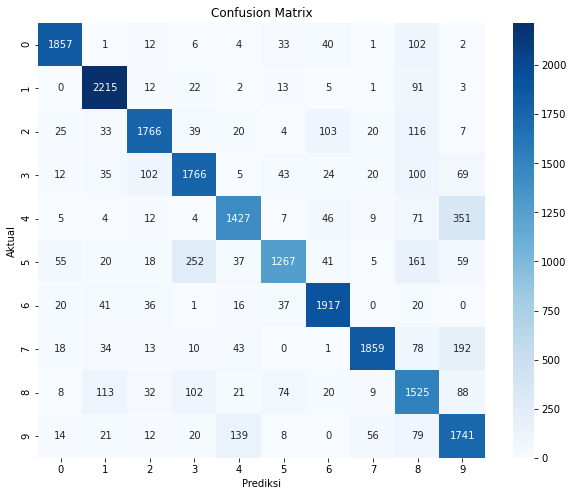

In [16]:
import numpy as np
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

# Melakukan prediksi pada data pengujian
y_pred = nb_classifier.predict(X_test)

# Menghasilkan confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred)

# Menampilkan confusion matrix menggunakan heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=range(10), yticklabels=range(10))
plt.xlabel('Prediksi')
plt.ylabel('Aktual')
plt.title('Confusion Matrix')
plt.show()


##### Split Dataset 90 : 10

In [17]:
from sklearn.model_selection import train_test_split

# Bagi dataset menjadi data latih (train) dan data uji (test) dengan proporsi 90:10
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1, random_state=42)

In [18]:
from sklearn.naive_bayes import MultinomialNB
from sklearn.datasets import fetch_openml

# Muat dataset MNIST
mnist = fetch_openml('mnist_784')
X, y = mnist.data.astype('int'), mnist.target.astype('int')

# Inisialisasi dan melatih model Multinomial Naive Bayes
nb_classifier = MultinomialNB()
nb_classifier.fit(X_train, y_train)

MultinomialNB()

In [19]:
import numpy as np
from sklearn.metrics import accuracy_score

# Melakukan prediksi pada data pelatihan dan pengujian
y_train_pred = nb_classifier.predict(X_train)
y_test_pred = nb_classifier.predict(X_test)

# Menghitung akurasi data pengujian
accuracy_test = accuracy_score(y_test, y_test_pred)
print("Akurasi Data Testing:", accuracy_test)

# Menghitung akurasi data pelatihan
accuracy_train = accuracy_score(y_train, y_train_pred)
print("Akurasi Data Training:", accuracy_train)

Akurasi Data Testing: 0.8294285714285714
Akurasi Data Training: 0.8268412698412698


In [20]:
import numpy as np
from sklearn.metrics import classification_report

# Melakukan prediksi pada data pelatihan dan pengujian
y_train_pred = nb_classifier.predict(X_train)
y_test_pred = nb_classifier.predict(X_test)

# Menampilkan classification report
print("\nClassification Report untuk Data Testing:")
print(classification_report(y_test, y_test_pred))

print("\nClassification Report untuk Data Training:")
print(classification_report(y_train, y_train_pred))


Classification Report untuk Data Testing:
              precision    recall  f1-score   support

           0       0.94      0.91      0.92       683
           1       0.86      0.94      0.90       800
           2       0.87      0.82      0.85       674
           3       0.79      0.82      0.81       760
           4       0.83      0.74      0.79       611
           5       0.88      0.69      0.77       658
           6       0.86      0.91      0.89       677
           7       0.95      0.82      0.88       724
           8       0.67      0.76      0.71       693
           9       0.72      0.85      0.78       720

    accuracy                           0.83      7000
   macro avg       0.84      0.83      0.83      7000
weighted avg       0.84      0.83      0.83      7000


Classification Report untuk Data Training:
              precision    recall  f1-score   support

           0       0.92      0.91      0.91      6220
           1       0.89      0.94      0.91  

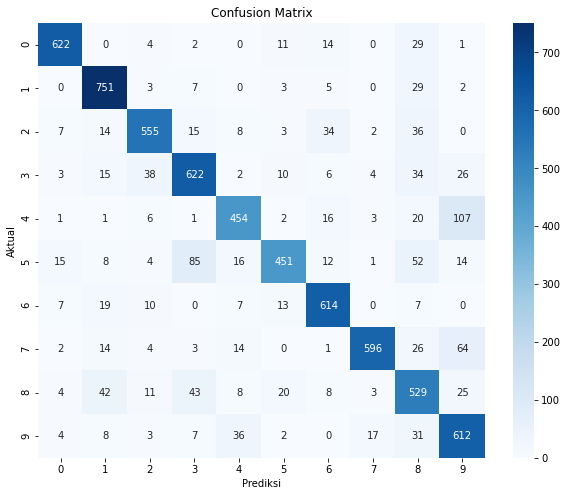

In [21]:
import numpy as np
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

# Melakukan prediksi pada data pengujian
y_pred = nb_classifier.predict(X_test)

# Menghasilkan confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred)

# Menampilkan confusion matrix menggunakan heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=range(10), yticklabels=range(10))
plt.xlabel('Prediksi')
plt.ylabel('Aktual')
plt.title('Confusion Matrix')
plt.show()

KeyError: 0

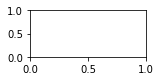

In [48]:
import pandas as pd
n_samples_to_display = 35
plt.figure(figsize=(12,6))
for i in range(n_samples_to_display):
    plt.subplot(6,5,i+1)
    plt.imshow(X_test[i].reshape(28,28), cmap="gray")

    true_label = y_test.iloc[i] if isinstance(y_test, pd.Series) else y_test[i]
    pred_label = y_test_pred.iloc[i] if isinstance(y_test_pred, pd.Series) else y_test_pred[i]

    if true_label == pred_label:
        text_color = 'blue'
    else:
        text_color = 'red'

    plt.title(f"True: {true_label}\nPred: {pred_label}", color = text_color)
    plt.axis("off")

plt.tight_layout()
plt.show()

Berdasarkan pada hasil akurasi diatas, dapat disimpulkan sebagai berikut
- SPLIT DATASET 80 : 20 <br>
Akurasi Data Testing: 0.829 <br>
Akurasi Data Training: 0.8266785714285714

- SPLIT DATASET 70 : 30<br>
Akurasi Data Testing: 0.8257142857142857<br>
Akurasi Data Training: 0.8278979591836735

- SPLIT DATASET 90 : 10<br>
Akurasi Data Testing: 0.8294285714285714<br>
Akurasi Data Training: 0.8268412698412698

Jika dilihat pada data diatas, model terbaik diperoleh ketika melakukan pembagian dataset 90 : 10. Pembagian dataset 90 : 10 memberikan akurasi pengujian yang baik tanpa menunjukan tanda-tanda overfitting yang signifikan. Oleh karena itu, model dengan pembagian 90 : 10 menggunakan ekstraksi PCA dan algoritma Multinomial Naive Bayes adalah pilihan yang baik dengan tingkat akurasi sekitar 82,94% pada data pengujian